<a href="https://www.kaggle.com/code/iamarunkumar/4-polynomial-regression?scriptVersionId=178326635" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Polynomial regression intution

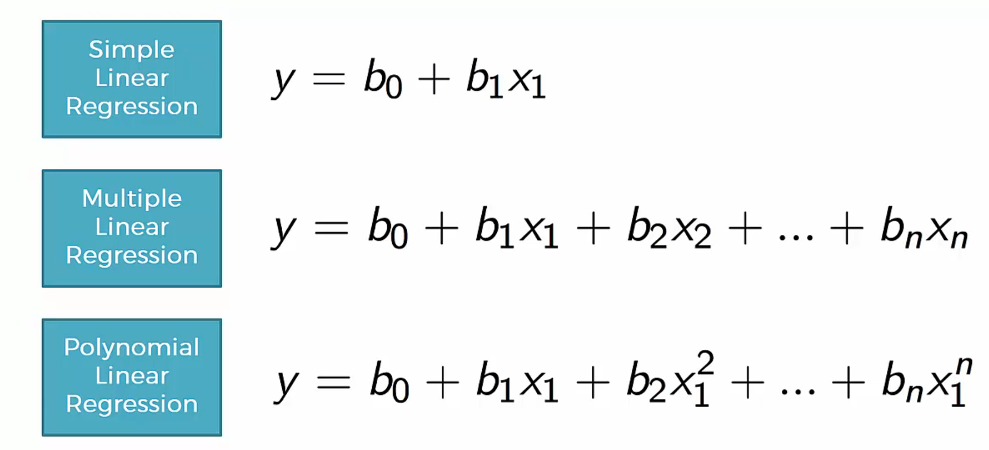

Polynomial regressions are mainly used for **non-linear datasets** or **datasets with non-linear relationship**

Polynomial regresstion is similar to multiple LR but instead of having a different variable (X1, X2, X3) it has same variable but with different power (X1, X1^2, X1^3, X1^4 etc.)

Here, when the dataset is plotted, we will find the graph as 'curved' shape or parabloic effect and not straight line. So, polynomial best fits for the data sets that has curved graph or parabolic effect (data points will increase going forward and that's the reason X1, X1^2, X1^3 etc..)

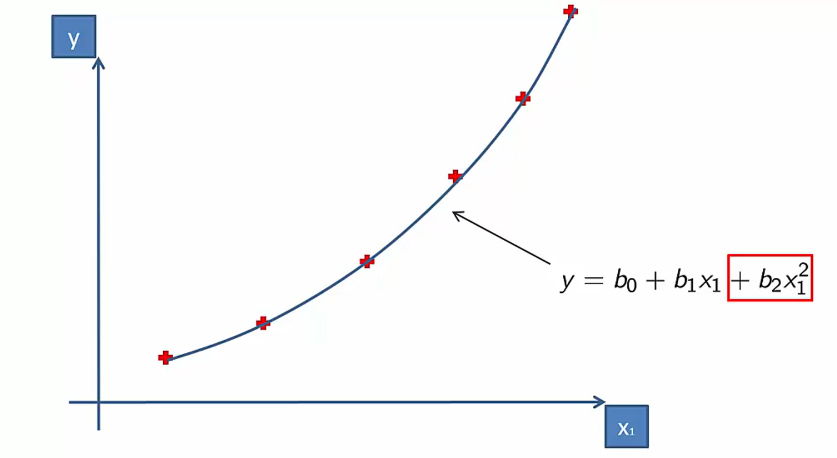

It is used to describe how diseases spread or pandemics and epidemics spread across territory or across population

**Interesting** - While polynomial linear regression is used for **non-linear datasets** why is it still called **linear**?

**Answer** - See, when we are talking about linear and non-linear in equation, We are referring to the **co-efficients (b0, b1, b2, b3...bn)** which is **linear in nature** and we are not talking about **variables (X1, X1^2, X1^3)** which is **non-linear in nature**. . Hence, we still refer the polynomial regression as polynomial linear regression. Moreover, y is the function of x or f(x) and since the **coefficients are unknown our goal while building ML model is to find out the values of those coefficients and use those coefficients to plug in X and predict y whether it's simple or multiple or polynomial regression.** Finally, linear and non-linear refers to co-efficients (b0,b1,b2,...bn) and not variables (X1,X1^2,X1^3)

Perhaps, we had an equation that has coeffients which cannot replace it with another co-efficient to turn the equation into linear, may be we can call it as non-linear equation. 
        eg. y = b0/b1+x1 or 
            y = b0 + b1x1/b2 + x2

**Scenario - We HR department hired a candidate who seeks for $160,000/annum as salary. Since the expected salary is huge and after negotiations, we came to know that the candidate's previous salary is the same and he wants at least this salary. Now, our job is to find out whether his statement is true or not. and that's why we use polynomial regression. We use polynomial regression model to predict the previous salary of the candidate.**

# Importing the libraries

In [ ]:
# Let's import the required libraries used for polynomial regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [ ]:
# Let's import the data set required to build the polynomial regression model.

df = pd.read_csv('/kaggle/input/position-salaries/Position_Salaries.csv')

"""Very important - unlike other datasets, we won't use df.iloc[:,:-1]. we will use df.iloc[:,1:-1] because we already done
labelencoder() manually for all positions in second column (values with 1,2,3,4 etc). All these values are starting from
Business analyst (1) till CEO(10). Hence we are ignoring the zeroth index column (postion of resources)."""

X = df.iloc[:,1:-1].values
y = df.iloc[:,-1]

# Training linear regression model on the whole dataset

In [ ]:
"""We skipped the step of splitting the data set into training set and test set so as to leverage the maximum of data set 
to predict the salary between position 6 & 7 (in dataset)

Let's import LinearRegressor class from linear_model module of sklearn library."""

from sklearn.linear_model import LinearRegression

"""we create an object under the name of lin_reg since this time we have 2 regression (linear & polynomial). Usually it
will be regressor."""

lin_reg = LinearRegression()

"""Here we directly pass X & y in the argument of fit(). Usually it will be X-train & y-train. but since we didn't split 
the dataset so as to leverage the maximum of input, we use the whole data of X & y."""

lin_reg.fit(X,y)

# Training the polynomial regression on the whole dataset

In [ ]:
"""Until now we had predicted y = b0 + b1X1. Means, we had the X1(one featured position levels) and the y(dependent 
variable vector to predict the salaries). But from now, we will create a powered featrues. X1, X1^2, X1^3,.......X1^n

The process of building this model on python will be first to create matrix of features. remember not different 
features (X1,X2,X3) but with same features. powered features as X1 as the first feature, X1^2 as the second feature, 
X1^n as the nth feature and these are called as X-poly.
Next, we will create lin_reg object from LinearRegression class to integreate these powered features of matrix of 
features in this new linear regressor. 

Let's import the tool that allow us to create the matrix of powered features. It's imported from 
PolynomialFeatures class of preprocessing module in sklearn library."""

from sklearn.preprocessing import PolynomialFeatures

"""Now, we will create an object called poly_reg for PolynomialFeatures
Now, that's where 'n' (from polynomial regression equation) is chosen in PolynomialFeatures class. 
First, we will start with 2 and then finally 'n'. For this, we will pass the parameter as 'degree' and pass the 
value as 2. bear witht eh degree value if it's changed to 2 or 3 or 4 because it's fine tuned as per last part of code."""

poly_reg = PolynomialFeatures(degree=4)

"""The next step is to proceed to this transformation of simple matrix of feature containing only X1 to X1^2 since 
degree is 2. This is simply the matrix of features of position levels of different powers
We will store the resultset in variable called X_poly."""

X_poly = poly_reg.fit_transform(X)

"""Now we will build the linear regression model that will integrate these features into the equation y=b0 + b1X1 + b2X1^2.
We will create a variable called lin_reg_2 for this."""

lin_reg_2 = LinearRegression()

"""Now, lin_reg_2 object will be trained on this new matrix of features composed of position levels at different powers and
the dependent variable vector y(salaries)."""

lin_reg_2.fit(X_poly,y)

# Visualizing the linear regression results

In [ ]:
"""We use matplotlib to visualize the linear regression model of predicted salary.
We use scatter method that will take 2d array as input."""

plt.scatter(X,y,color='red')

"""we use plot() to plot the position levels against the predicted salaries. So, we use lin_reg for linear regression models
and don't use lin_reg_2 because that's for polynomial regression."""

plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

# Visualizing the polynomial regression results



In [ ]:
"""We use matplotlib to visualize the polynomial regression model of predicted salary.
We use scatter method that will take 2d array as input."""

plt.scatter(X,y,color='red')

"""Now we need to plot for polynomial regression which is the mixture of position levels and powered matrix of features.
Remember, always in plot(), we use one coordinate as X or X_train and another coordinate as predict() of X_train or X_poly.
So we use lin_reg_2 variable which has the polynomial regression built that has the polynomial features with specified
degrees. Remember, the larger the degree, the accurate the model. To be more accurate, set the degree as 4 and rerun."""

plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Truth or bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

# Visualizing the Polynomial regression results (for higher resolution and smoother curve)

In the previous graph, only the straight lines were plotted between each consecutive points in dataset. Because of this the curve is not as smooth as we would hope for.

Now, we have an optimised code below for smoother and beautiful curve. Instead of taking integers (1,2,3,4) we increased the density of integers taking not only integers, we also taken 1,1,1,1.2,1.3,1.4,1.5,until 9.7,9.8,9.9,10
This is what we call it as **0.1** in X_grid variable

In [ ]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

# Predicting a new result with linear regression

Here, we will predict the salary of the candidate with the position level 6.5 because that is what we are asked for. That's what we are trying to build a model and predict the salary expectation falling between the position 6 and 7 (refer the input for salary against poition levels).

**Interestingly if we directly put 6.5 in predict method, it won't work. Because the predict method expects an array always as an input. So, we must use double brackets to denote it as 2D array. If we mention in single pair of bracket it would mean as list or vector. Each pair of brackets determines the dimension of array. If it's single pair then it's first dimension and if it's double pair then it's second dimension. Actually, the first dimension corresponds to rows and the second dimension corresponds to columns.** For eg, [[6.5,5]] - This will create one row and two columns. or if we have [[6.5,5],[4,9]] - This will create two rows and two columns.

In [ ]:
"""Let's use 6.5 position level as an array (use double pair of brackets) in predict method to predict the salary
Remember we are doing it for linear regression. So use, lin_reg variable which has single matrix of features."""

lin_reg.predict([[6.5]])

"""If you see the output, cleary it's wrong prediction. Since 330378 (33k) is far beyond the expected salary (16k) of a
candidate. So, the linear regression model wrongly predicted the salary. And that's even evident in chart as well.
Let's next see the polynomial regression prediction which has powered matrix of features."""

# Predicting a new result with polynomial regression

Clearly, the linear regression prediction were wrong last time. Now, let's see if the polynomial regression predicts the salary for the position level 6.5

We cannot directly pass the [[6.5]] in predict method as we get an error. So, we need to pass the polynomial features with degrees which in turn take the 2d array of an input (6.5)

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

"""Now, the prediction is as close as to the expected salary. with the degree 4, the predicted salary is 159k which is very
very close to the expected salary. So, the polynomial regression worked perfectly well with the dataset."""